<a href="https://colab.research.google.com/github/CoderJuan21/Project-122/blob/main/Project122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
from google.colab import files
notfiles = files.upload()

Saving labels.csv to labels.csv


In [3]:
from google.colab import files
notfiles = files.upload()

Saving image.npz to image.npz


In [6]:
X = np.load("image.npz")["arr_0"]
y = pd.read_csv("labels.csv")["labels"]
print(pd.Series(y).value_counts())
classes = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
nclasses = len(classes)

S    550
L    550
P    550
E    550
U    550
J    550
I    550
B    550
Z    550
Y    550
C    550
X    550
Q    550
V    550
M    550
T    550
W    550
O    550
D    550
N    550
K    550
F    550
H    550
R    550
A    550
G    550
Name: labels, dtype: int64


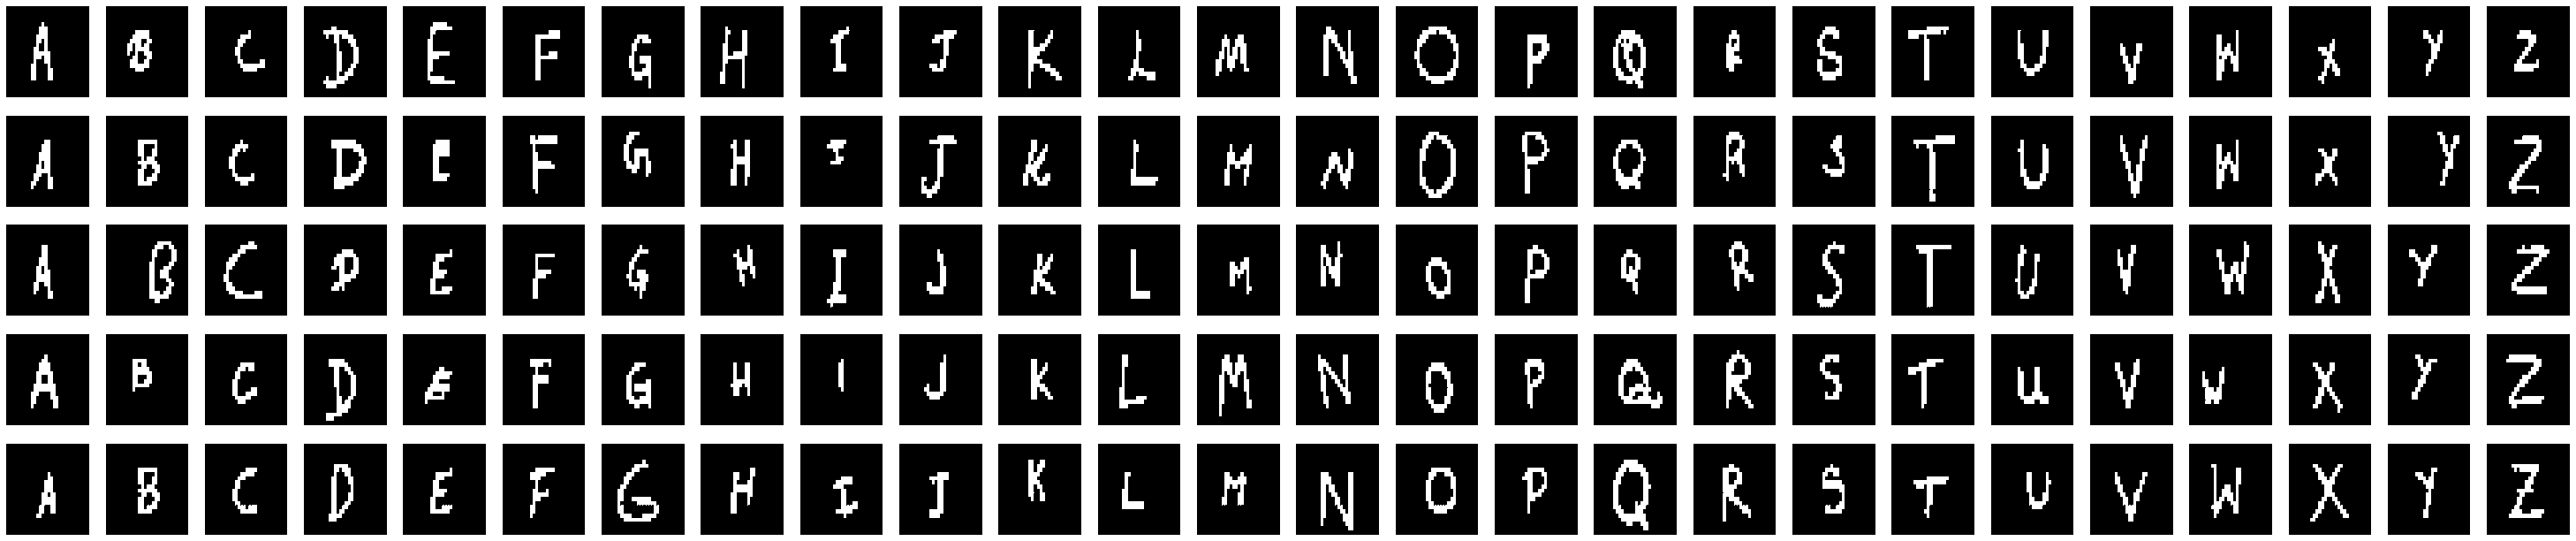

In [8]:
samples = 5
figure = plt.figure(figsize=(nclasses*2, (1+samples*2)))
idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y==cls)
  idxs = np.random.choice(idxs,samples,replace=False)
  i = 0
  for idx in idxs:
    plt_idx = i* nclasses+1+idx_cls
    p = plt.subplot(samples, nclasses, plt_idx);
    p = sns.heatmap(np.reshape(X[idx],(22,30)), cmap=plt.cm.gray, xticklabels=False,yticklabels=False, cbar=False);
    p = plt.axis("off")
    i+=1
  idx_cls += 1

In [9]:
print(len(X))
print(len(X[0]))

14300
660


In [10]:
print(X[0])
print(y[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.
 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 255. 255.   0.   0.   0.   0.
   0. 

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=9, train_size=7500, test_size=2500)
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0
clf = LogisticRegression(solver="saga", multi_class= "multinomial").fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [12]:
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy * 100)

99.52


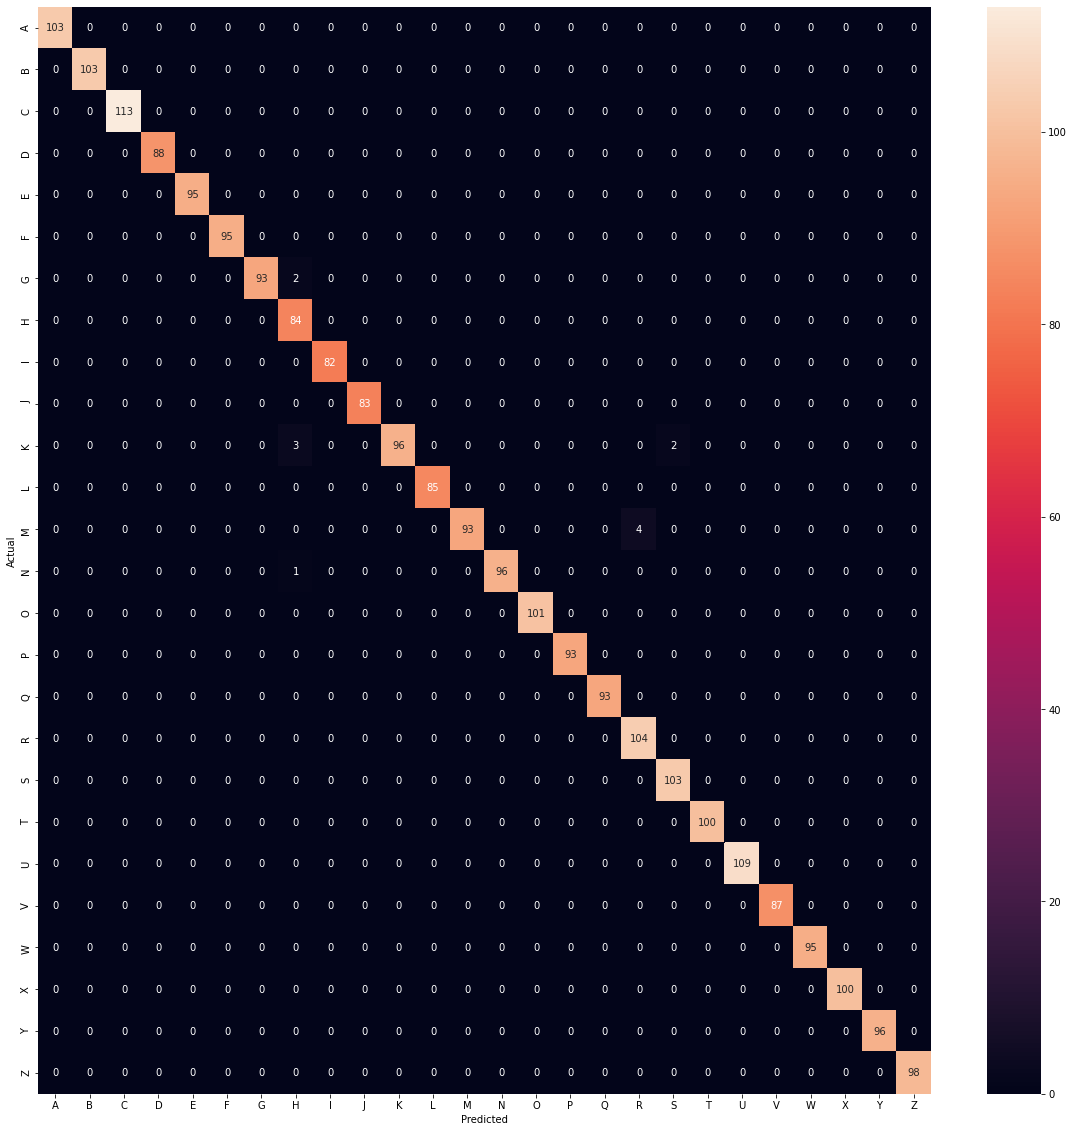

In [14]:
cm = pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])
p = plt.figure(figsize=(20,20))
p = sns.heatmap(cm, annot=True, fmt="d", cbar=True)